<h1>Learning Python</h1>

Google Colab

## **1. Cryptography using text files (read files, write on file, create file, work with strings, try-except, and functions)**
Given decrypt_me.txt and encrypt_me.txt

Encrypt or decrypt the text file and save the result to a new file




In [ ]:
# ord() returns unicode from given character
# chr() method returns a string representing a character from given Unicode integer
# Encrypt and Decrypt functions

# Encrypt 
def encrypt(text, key):
  result = ""
  for character in text:
    # A-Z (65-90)
    if character.isupper():
      result += chr((ord(character) + key - 65) % 26 + 65)
    # a-z (97-122)
    elif character.islower():
      result += chr((ord(character) + key - 97) % 26 + 97)
    # Preserve space and other symbols
    else:
      result += character
  return result

# Decrypt
def decrypt(text, key):
  result = ""
  for character in text:
    # A-Z (65-90)
    if character.isupper():
      result += chr((ord(character) - key - 65) % 26 + 65)
    # a-z (97-122)
    elif character.islower():
      result += chr((ord(character) - key - 97) % 26 + 97)
    # Preserve space and other symbols
    else:
      result += character
  return result


In [ ]:
def check_file_name(file_name):
  try:
    # Open file for reading only ('r')
    data_file = open(file_name, 'r')
    # iterate through the file one line at a time
    for line_str in data_file:
        line_str = line_str
        #print(line_str)
  # File does not exist 
  except FileNotFoundError:
    return False
  else:
    return line_str
# Prompt user to enter input and validate it
while True:
  quit_x = ["x","X"]
  option_ed = ["e","d","E","D"]
  file_name = input("\nPlease enter file name or 'x' to quit: ")
  option = input("Type 'e' for encrypting or 'd' for decrypting: ")
  
  # Shift key (hard code) = 3
  shift_key = 3
  
  # If user enters x then exit. Otherwise, validate the file name
  if file_name in quit_x:
    break
  # If user forgot to include '.txt' in their input, then add it 
  if (file_name.find('.txt') == -1):
    file_name = file_name + ".txt"
    print(f"\nReading file {file_name} ...")
  else:
    print(f"\nReading file {file_name} ...")
  #Validate file name
  data = check_file_name(file_name)
  if (data == False):
    print("File not found in the system! Try again!")
    continue
  else:
    # Validate input for 'e' or 'd'
    if (option not in option_ed):
      print("Wrong command! Please try again! ")
      continue
    else: 
      if option.lower() == 'e':
        encrypted = encrypt(data, shift_key)
        print(f"Original Text: {data}")
        print(f"After encrypting: {encrypted}")
        # Open new file and store result
        encrypted_file = open("encrypted.txt", "w+")
        encrypted_file.write(encrypted)
        encrypted_file.close()
        print(f"Successfuly stored the new file!")
      else:
        decrypted = decrypt(data, shift_key)
        print(f"Original Text: {data}")
        print(f"After decrypting: {decrypted}")
        # Open new file and store result
        decrypted_file = open("decrypted.txt", "w+")
        decrypted_file.write(decrypted)
        decrypted_file.close()
        print(f"Successfuly stored the new file!")









Please enter file name or 'x' to quit: a
Type 'e' for encrypting or 'd' for decrypting: b

Reading file a.txt ...
File not found in the system! Try again!

Please enter file name or 'x' to quit: encrypt_me
Type 'e' for encrypting or 'd' for decrypting: e

Reading file encrypt_me.txt ...
Original Text: This is a test.
After encrypting: Wklv lv d whvw.
Successfuly stored the new file!

Please enter file name or 'x' to quit: decrypt_me
Type 'e' for encrypting or 'd' for decrypting: d

Reading file decrypt_me.txt ...
Original Text: Brx kdyh sdvvhg wkh whvw. Frqjudwxodwlrqv!
After decrypting: You have passed the test. Congratulations!
Successfuly stored the new file!

Please enter file name or 'x' to quit: x
Type 'e' for encrypting or 'd' for decrypting: x


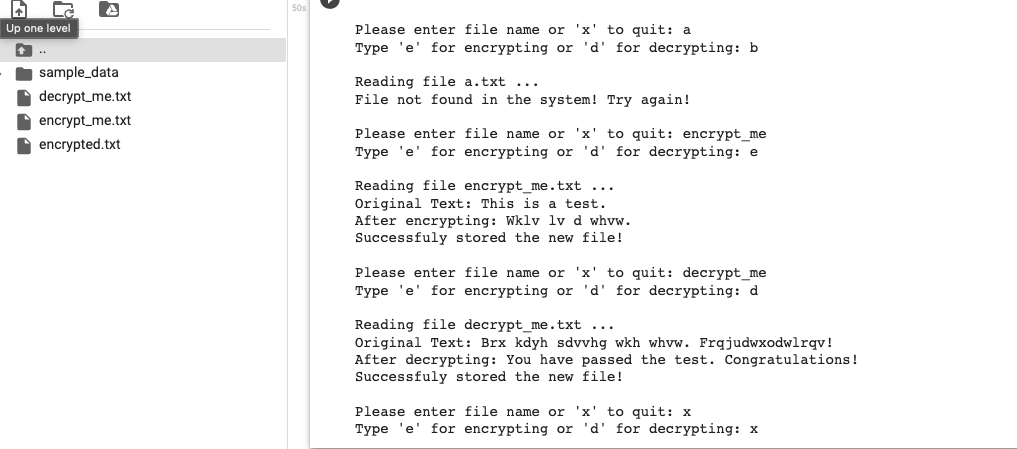

## **2. Fuel consumption (list, tuple, functions, and csv file manipulation)**
Given epaData2020.csv and epadata2015.csv

Find all the vehicles in the MPG interval that user provides (store vehicle's info in appropriate data structure)

Plot the trend using pylab
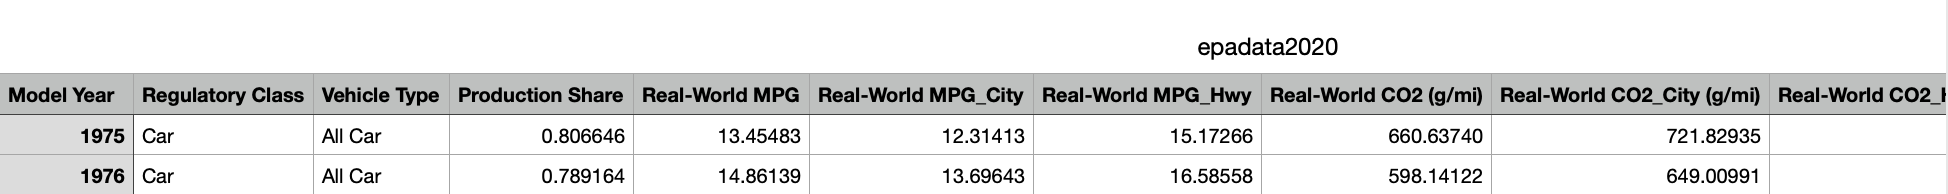

In [ ]:
# Using epaData202.csv to find vehicles with requirements above 
import csv
import string
import pylab as plt

# Create a list which contains tuples of car's information (mile, make, model) 
def create_car_list(csv_reader):
  car_list = []
  for row in csv_reader:
    # Skip headline
    if "Model Year" in row[0]:
      continue
    # Tuple will include (Hw FE (Guide), Division, Carline)
    car_tuple = (int(row[10]), row[2], row[3])
    #Append to car lsit
    car_list.append(car_tuple)
  return car_list 

# Open file and read it
epa_2015 = open("epadata2015.csv", "r")
epa_2015_reader = csv.reader(epa_2015)

# Create car list to store car's information
car_list = create_car_list(epa_2015_reader)

# Validate interval 
# Find max and min mileage to check if the interval is valid or not
# First index is mile in car list 
max_mile = max(car_list)[0]
min_mile = min(car_list)[0]
count = 0
print(f"Max: {max_mile} and Min: {min_mile}")

# Prompt user to enter interval
while True:
  quit_x = ["x","X"]
  try:
    first_interval = int(input("\nEnter first interval: "))
    second_interval = int(input("Enter second interval: "))
    if (first_interval > max_mile or first_interval < min_mile or second_interval > max_mile or second_interval < min_mile):
      print("The interval does not exist. Try again!")
      continue
  except ValueError:
    print(f"Interval should be numbers! Try again!")
    continue
  else:
    # Store user's interval to a list and sort it 
    interval_list = [first_interval,second_interval]
    interval_list.sort()
    print(f"These are all the vehicles in the range from {interval_list[0]} and {interval_list[1]}")
    for car_tuple in car_list:
      if (car_tuple[0] <= interval_list[1] and car_tuple[0] >= interval_list[0]):
        print(f"\t {car_tuple[0]} {car_tuple[1]} {car_tuple[2]}")
        count += 1
    print(f"Total count: {count}")
    break


Max: 48 and Min: 14

Enter first interval: 15
Enter second interval: 16
These are all the vehicles in the range from 15 and 16
	 15 Bugatti Veyron
	 16 Ferrari North America F12
	 16 Ferrari North America F12
	 16 Lamborghini Aventador Roadster
	 16 Ferrari North America FF
	 15 Chevrolet G2500 EXPRESS CONV 2WD CARGOMDPV
	 15 Chevrolet G2500 EXPRESS CONV 2WD CARGOMDPV
	 15 GMC G2500 SAVANA CONV 2WD CARGO MDPV
	 15 GMC G2500 SAVANA CONV 2WD CARGO MDPV
	 16 Chevrolet G2500 EXPRESS 2WD PASS MDPV
	 16 Chevrolet G2500 EXPRESS 2WD PASS MDPV
	 16 Chevrolet G3500 EXPRESS 2WD PASS MDPV
	 16 Chevrolet G3500 EXPRESS 2WD PASS MDPV
	 16 GMC G2500 SAVANA 2WD PASS MDPV
	 16 GMC G2500 SAVANA 2WD PASS MDPV
	 16 GMC G3500 SAVANA 2WD PASS MDPV
	 16 GMC G3500 SAVANA 2WD PASS MDPV
	 15 Mercedes-Benz G 550
Total count: 18


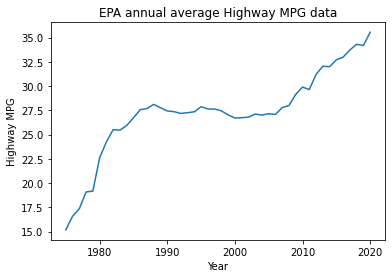

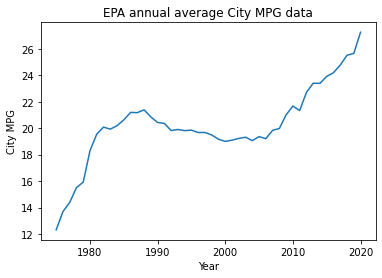

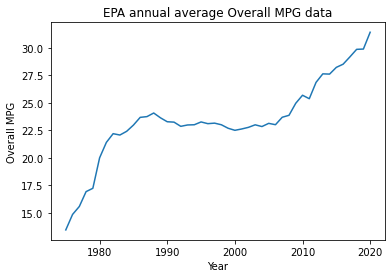

In [ ]:
## Plot the trend using epadata2020.csv (Highway, City, and Overal MPG)
x,y,y1,y2 = [],[],[],[] 
option_HCO = ["H","C","O"]
title = ["EPA annual average Highway MPG data","EPA annual average City MPG data","EPA annual average Overall MPG data"]
y_label = ["Highway MPG","City MPG","Overall MPG"]

def plot_func(x,y,y_label,title):
  plt.plot(x,y, label=y_label)
  plt.xlabel("Year")
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()


# Open file
epa_2020 = open("epadata2020.csv", "r")
epa_2020_reader = csv.reader(epa_2020)

# Read file 
for option in option_HCO:
  for row in epa_2020_reader:
    # Skip headline
    if "Model Year" in row[0]:
      continue
    # Append year and 2020 as x
    if row[0] == "Prelim. 2020":
      x.append(int(2020))
    else:
      x.append(int(row[0]))
    # Append MPG as y
    # Highway
    y.append(float(row[6]))
    # City
    y1.append(float(row[5]))
    # Overall
    y2.append(float(row[4]))
  if option == "H":
    plot_func(x,y,y_label[0],title[0])
  if option == "C":
    plot_func(x,y1,y_label[1],title[1])
  if option == "O":
    plot_func(x,y2,y_label[2],title[2])






## **3. Iris dataset (dictionaries, csv, summary statistics, and normalize data)**

Read data from iris.csv and store in dictionaries (key as species name and values as average of each of four features)

Print the summary statistics

Normalize data

In [ ]:
import csv 
# Calculate averages
def calculate_average(csv_reader):
  iris_dict = {"setosa": [0,0,0,0],
               "versicolor": [0,0,0,0],
               "virginica": [0,0,0,0]
               }
  count_species = {"setosa": 0,
                   "versicolor": 0,
                   "virginica": 0}
  for row in csv_reader:
    # Skip header
    if row[0] == "sepal_length":
      continue
    # Key (species name) and value (sum of each attribute (sepal_length, sepal_width, petal_length, and petal_width))
    species = row[4]
    for i in range(4):
      iris_dict[species][i] = float(iris_dict[species][i]) + float(row[i])
    count_species[species] = count_species[species] + 1 
  print(count_species)
  # Calculate the average of sum of each attribute
  for i, (key,value) in enumerate(iris_dict.items()):
    for j in range(len(iris_dict[key])):
      iris_dict[key][j] = iris_dict[key][j]/count_species[key]
  return iris_dict

# Print the result
def pretty_print(iris_average):
    print("\n")
    print("---------------------------------------------------------------------")
    print("Species\t \t \tSetosa\t Versicolor{:>12s}".format("Virginica"))
    print("---------------------------------------------------------------------")
    print("Attributes (cm):")
    print("Avg sepal length: {:11.2f} {:10.2f} {:11.2f}".format(iris_average["setosa"][0],iris_average["versicolor"][0],iris_average["virginica"][0]))
    print("Avg sepal width: {:12.2f} {:10.2f} {:11.2f}".format(iris_average["setosa"][1],iris_average["versicolor"][1],iris_average["virginica"][1]))
    print("Avg petal length: {:11.2f} {:10.2f} {:11.2f}".format(iris_average["setosa"][2],iris_average["versicolor"][2],iris_average["virginica"][2]))
    print("Avg petal width: {:12.2f} {:10.2f} {:11.2f}".format(iris_average["setosa"][3],iris_average["versicolor"][3],iris_average["virginica"][3]))

# Read the file and Print the result
file_name = open("iris.csv", "r")
csv_reader = csv.reader(file_name)
iris_average = calculate_average(csv_reader)
pretty_print(iris_average)


{'setosa': 50, 'versicolor': 50, 'virginica': 50}


---------------------------------------------------------------------
Species	 	 	Setosa	 Versicolor   Virginica
---------------------------------------------------------------------
Attributes (cm):
Avg sepal length:        5.01       5.94        6.59
Avg sepal width:         3.42       2.77        2.97
Avg petal length:        1.46       4.26        5.55
Avg petal width:         0.24       1.33        2.03


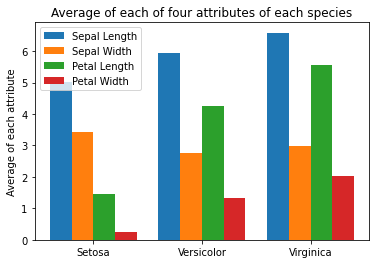

In [ ]:
# Plot bar graph
import numpy as np
import pylab as plt

width = 0.2
y_sepal_length = []
y_sepal_width = [] 
y_petal_length = []
y_petal_width = []

for value in iris_average.values():
  y_sepal_length.append(value[0])
  y_sepal_width.append(value[1])
  y_petal_length.append(value[2])
  y_petal_width.append(value[3])


plt.bar((np.arange(3) + width), y_sepal_length, width, label='Sepal Length')
plt.bar((np.arange(3) + width*2), y_sepal_width, width, label='Sepal Width')
plt.bar((np.arange(3) + width*3), y_petal_length, width, label='Petal Length')
plt.bar((np.arange(3) + width*4), y_petal_width, width, label='Petal Width')
plt.ylabel('Average of each attribute')
plt.title('Average of each of four attributes of each species')

plt.xticks(np.arange(3)+0.5, ('Setosa', 'Versicolor', 'Virginica'))
plt.legend(loc='best')
plt.show()


In [ ]:
# Summary Statistics (Standard and Normalized Data)
import statistics
def create_dict(csv_reader):
  iris_dict = {"setosa":    {"sepal_length":[], "sepal_width":[], "petal_length":[], "petal_width":[] }, 
              "versicolor": {"sepal_length":[], "sepal_width":[], "petal_length":[], "petal_width":[] }, 
              "virginica":  {"sepal_length":[], "sepal_width":[], "petal_length":[], "petal_width":[] }
              }  

  for row in csv_reader:
    # Skip header
    if row[0] == "sepal_length":
      continue
    # Key (species name) and value (sum of each attribute (sepal_length, sepal_width, petal_length, and petal_width))
    species = row[4]
    attribute_list = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
    for i,attri in enumerate(attribute_list):
      iris_dict[species][attri].append(float(row[i]))
  return iris_dict

def summary_stat(iris_dict,spec,norm=None):
  min_sp_length = min(iris_dict[spec]["sepal_length"])
  max_sp_length = max(iris_dict[spec]["sepal_length"])
  mean_sp_length = sum(iris_dict[spec]["sepal_length"])/len(iris_dict[spec]["sepal_length"])
  stdv_sp_length = statistics.stdev(iris_dict[spec]["sepal_length"])
  
  min_sp_width = min(iris_dict[spec]["sepal_width"])
  max_sp_width = max(iris_dict[spec]["sepal_width"])
  mean_sp_width = sum(iris_dict[spec]["sepal_width"])/len(iris_dict[spec]["sepal_width"])
  stdv_sp_width = statistics.stdev(iris_dict[spec]["sepal_width"])

  min_pt_length = min(iris_dict[spec]["petal_length"])
  max_pt_length = max(iris_dict[spec]["petal_length"])
  mean_pt_length = sum(iris_dict[spec]["petal_length"])/len(iris_dict[spec]["petal_length"])
  stdv_pt_length = statistics.stdev(iris_dict[spec]["petal_length"])

  min_pt_width = min(iris_dict[spec]["petal_width"])
  max_pt_width = max(iris_dict[spec]["petal_width"])
  mean_pt_width = sum(iris_dict[spec]["petal_width"])/len(iris_dict[spec]["petal_width"])
  stdv_pt_width = statistics.stdev(iris_dict[spec]["petal_width"])
  
  print("\n")
  print("The summary statistics below is for {:s}".format(spec))
  if norm == True:
    print("Normalized data")
  else:
    print("Standard")
  print("----------------------------------------------------------------------------")
  print("\t \tSepal Length\t Sepal Width\t Petal Length \t Petal Width")
  print("----------------------------------------------------------------------------")
  print("Count: {:17.2f} {:14.2f} {:16.2f} {:16.2f}".format(len(iris_dict[spec]["sepal_length"]),len(iris_dict[spec]["sepal_width"]),len(iris_dict[spec]["petal_length"]),len(iris_dict[spec]["petal_width"])))
  print("Minimum: {:15.3f} {:14.3f} {:16.3f} {:16.3f}".format(min_sp_length,min_sp_width,min_pt_length,min_pt_width))
  print("Maximum: {:15.3f} {:14.3f} {:16.3f} {:16.3f}".format(max_sp_length,max_sp_width,max_pt_length,max_pt_width))
  print("Mean: {:18.3f} {:14.3f} {:16.3f} {:16.3f}".format(mean_sp_length,mean_sp_width,mean_pt_length,mean_pt_width))
  print("StDev: {:17.3f} {:14.3f} {:16.3f} {:16.3f}".format(stdv_sp_length,stdv_sp_width,stdv_pt_length,stdv_pt_width))

# Display the summary statistics for each species
file = open("iris.csv", "r")
data_reader = csv.reader(file)
iris_dict = create_dict(data_reader)
summary_stat(iris_dict,"setosa")
summary_stat(iris_dict,"versicolor")
summary_stat(iris_dict,"virginica")





The summary statistics below is for setosa
Standard
----------------------------------------------------------------------------
	 	Sepal Length	 Sepal Width	 Petal Length 	 Petal Width
----------------------------------------------------------------------------
Count:             50.00          50.00            50.00            50.00
Minimum:           4.300          2.300            1.000            0.100
Maximum:           5.800          4.400            1.900            0.600
Mean:              5.006          3.418            1.464            0.244
StDev:             0.352          0.381            0.174            0.107


The summary statistics below is for versicolor
Standard
----------------------------------------------------------------------------
	 	Sepal Length	 Sepal Width	 Petal Length 	 Petal Width
----------------------------------------------------------------------------
Count:             50.00          50.00            50.00            50.00
Minimum:           4.9

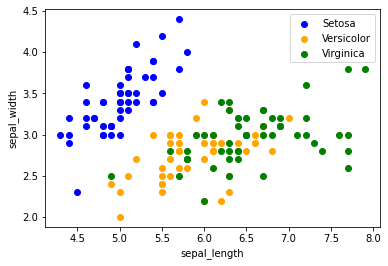

In [ ]:
# Plot scatter plot (sepal width vs. sepal length)
def plot_scatter(iris_dict,x,y):
  x_setosa = []
  y_setosa = []
  x_versi = []
  y_versi = []
  x_virgi = []
  y_virgi = []
  spec_list = ['setosa','versicolor','virginica']

  for spec in spec_list:
    for i,value in enumerate(iris_dict[spec][x]):
      if spec == "setosa":
        x_setosa.append(value)
        y_setosa.append(iris_dict[spec][y][i])
      elif spec == 'versicolor':
        x_versi.append(value)
        y_versi.append(iris_dict[spec][y][i])
      else:
        x_virgi.append(value)
        y_virgi.append(iris_dict[spec][y][i])
  plt.scatter(x_setosa,y_setosa,c='blue',label='Setosa')
  plt.scatter(x_versi,y_versi,c='orange',label='Versicolor')
  plt.scatter(x_virgi,y_virgi,c='green',label='Virginica')
  plt.legend(loc='best')
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()
plot_scatter(iris_dict,'sepal_length','sepal_width')


In [ ]:
# Create normalized dictionary
def normalize_dict(iris_dict):
  norm_dict = { "setosa":     {"sepal_length":[], "sepal_width":[], "petal_length":[], "petal_width":[] }, 
                "versicolor": {"sepal_length":[], "sepal_width":[], "petal_length":[], "petal_width":[] }, 
                "virginica":  {"sepal_length":[], "sepal_width":[], "petal_length":[], "petal_width":[] }
              }
  spec_list = ['setosa','versicolor','virginica']
  attri_list = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

  for spec in spec_list:
    for attri in attri_list:
      for value in iris_dict[spec][attri]:
        min_list = min(iris_dict[spec][attri])
        max_list = max(iris_dict[spec][attri])
        norm_dict[spec][attri].append((value-min_list)/(max_list-min_list))
  return norm_dict

norm_iris_dict = normalize_dict(iris_dict)
summary_stat(norm_iris_dict,"setosa",True)
summary_stat(norm_iris_dict,"versicolor",True)
summary_stat(norm_iris_dict,"virginica",True)



The summary statistics below is for setosa
Normalized data
----------------------------------------------------------------------------
	 	Sepal Length	 Sepal Width	 Petal Length 	 Petal Width
----------------------------------------------------------------------------
Count:             50.00          50.00            50.00            50.00
Minimum:           0.000          0.000            0.000            0.000
Maximum:           1.000          1.000            1.000            1.000
Mean:              0.471          0.532            0.516            0.288
StDev:             0.235          0.181            0.193            0.214


The summary statistics below is for versicolor
Normalized data
----------------------------------------------------------------------------
	 	Sepal Length	 Sepal Width	 Petal Length 	 Petal Width
----------------------------------------------------------------------------
Count:             50.00          50.00            50.00            50.00
Minimum:

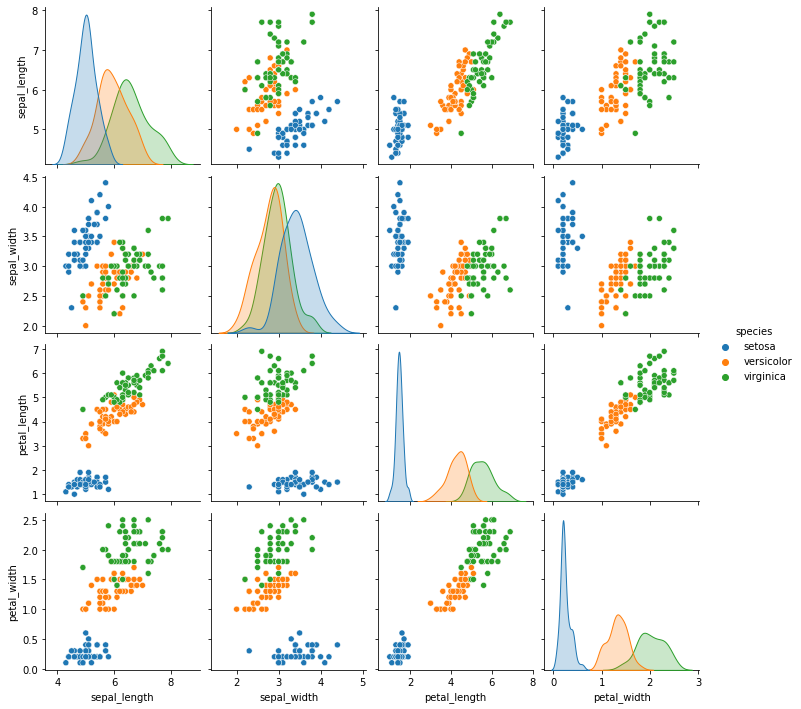

In [ ]:
# Using seaborn
import seaborn as sns
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue = "species")
plt.show()

## **4. Diabetes Classifier using csv, random, pyplot, and numpy**

Manually build a diabetes classifier (80% training set and 20% testing set)

Confusion matrix 

Plot a bar graph

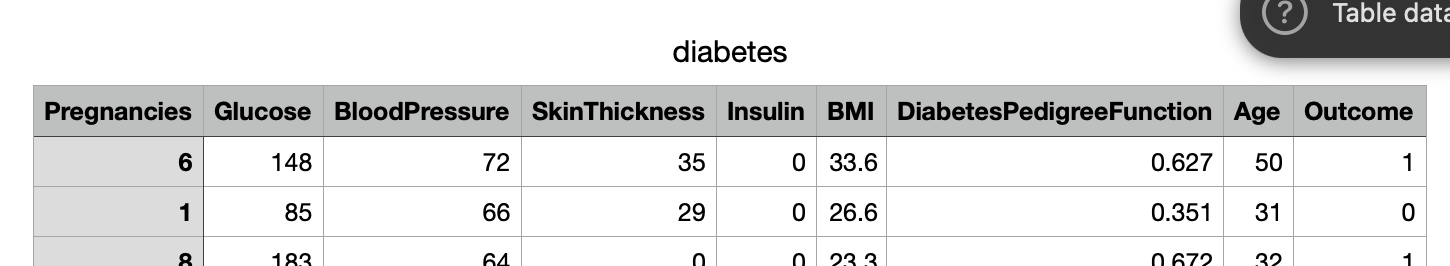

In [ ]:
import csv 
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Create a list of tuples of patient information
def create_dataset(file_name):
  data_file = open(file_name,'r')
  data_reader = csv.reader(data_file)

  dataset_list = []
  for row in data_reader:
    # Skip header
    if row[0] == "Pregnancies":
      continue
    patient_tuple = tuple((float(row[i]) for i in range(9)))
    dataset_list.append(patient_tuple)
  return dataset_list

# Add two list (same outcome) and calculate average 
def sum_list(list1,list2):
  sums_list = []
  for i in range(8):
    sums_list.append(list1[i] + list2[i])
  return sums_list
def cal_average(sums_list, count):
  average_list = []
  for value in sums_list:
    average_list.append(value/count)
  return average_list 

# Train classifier (return a list of classified values)
def train_classifier(training_set_list):
  # Create list of sum of diabete and not diabete with size of 8 
  diabete_sum_list = [0]*8
  diabete_count = 0
  no_diabete_sum_list = [0]*8
  no_diabete_count = 0
  # Traverse through training set to accumulate each attribute and count how many patient with diabete and without diabete
  for patient_tuple in training_set_list:
    # If outcome == 1 (diabetic), then add the first 8 elements and increment count
    if patient_tuple[8] == 1:
      diabete_sum_list = sum_list(diabete_sum_list,patient_tuple[:8])
      diabete_count += 1
    # If outcome = 0 (not diabetic), then add the first 8 elements and increment count
    else:
      no_diabete_sum_list = sum_list(no_diabete_sum_list,patient_tuple[:8])
      no_diabete_count += 1
  # Calculate average 
  diabete_average = cal_average(diabete_sum_list,diabete_count)
  no_diabete_average = cal_average(no_diabete_sum_list,no_diabete_count)
  
  # Calculate the average of classifier list 
  classifier_list = cal_average(sum_list(diabete_average,no_diabete_average),2)
  return classifier_list

    
  return result_list 
# Classify the set
def classify_test_set(test_set_list,classifier_list):
  result_list = []
  
  for patient_tuple in test_set_list:
    # Count how many attribute will classify that patient as positive or negative 
    diabete_count = 0 
    no_diabete_count = 0 
    for index in range(8):
      # If each value in the set is greater than the threshold value, then increment the count for diabete
      if patient_tuple[index] > classifier_list[index]:
        diabete_count += 1
      # Otherwise, increment the count for non-diabete
      else:
        no_diabete_count += 1
    # Create a tuple that stores number of attribute that classifies as diabete and non-diabete and its outcome
    result_tuple = (diabete_count,no_diabete_count,patient_tuple[8])
    result_list.append(result_tuple)
    
  return result_list 

# Create report for confusion matrix
def report_result(result_list):
  total_count = 0
  FP_count = 0
  TP_count = 0
  TN_count = 0
  FN_count = 0
  for result_tuple in result_list:
    total_count += 1
    # Predict diabete, but it is not diabetic 
    if (result_tuple[0] > result_tuple[1]) and (result_tuple[2] == 0.0):
      FP_count += 1
    # Predict not diabetic, but it is diabetic
    elif (result_tuple[0] < result_tuple[1]) and (result_tuple[2] == 1.0):
      FN_count += 1
    # Predict diabetic and it is diabetic
    elif (result_tuple[0] > result_tuple[1]) and (result_tuple[2] == 1.0):
      TP_count += 1 
    else:
      TN_count += 1
  print("Total count: {} \nTotal inaccurate: {} ".format(total_count,(FP_count+FN_count)))
  print()
  print("FP - Predict diabete, but it is not diabetic: {}".format(FP_count))
  print("FN - Predict not diabetic, but it is diabetic: {}".format(FN_count))
  print("TP - Predict diabetic and it is diabetic: {}".format(TP_count))
  print("TN - Predict not diabetic and it is not diabetic: {}".format(TN_count))
  print("\n")

  # Accuracy = (TP+TN)/total 
  # Precision = TP / (TP + FP)
  # Recall =  TP / (TP + FN)
  print("Accuracy: {:.2f}".format((TP_count+TN_count)/total_count))
  print("Precision: {:.2f}".format((TP_count/(TP_count+FP_count))))
  print("Recall: {:.2f}".format(TP_count/(TP_count+FN_count)))

# Plot bar graph for classifier values
def plot_classifier(classifier_list):
  plt.rcdefaults()
  fig, ax = plt.subplots()

  features = ['Pregnancies','Glucose','Blood Pressure','Skin Thickness','Insulin','BMI','Diabetes Pedigree Function','Age']
  y_pos = np.arange(len(features))
  values = [value for value in classifier_list]
  error = np.random.rand(len(features))

  ax.barh(y_pos, values, xerr=error, align='center')
  ax.set_yticks(y_pos)
  ax.set_yticklabels(features)
  ax.invert_yaxis()  
  ax.set_xlabel('Values')
  ax.set_title('Classifier value')
  plt.show()


Reading in data...
Done reading data.

Training set length : 614
Testing set length : 154
Training classifier...
Done training classifier.

Classifying records...
Done classifying.

[(1, 7, 1.0), (5, 3, 1.0), (5, 3, 1.0), (5, 3, 0.0), (3, 5, 0.0), (5, 3, 0.0), (3, 5, 1.0), (1, 7, 0.0), (0, 8, 0.0), (0, 8, 0.0), (4, 4, 0.0), (4, 4, 0.0), (5, 3, 0.0), (2, 6, 0.0), (7, 1, 1.0), (3, 5, 0.0), (7, 1, 0.0), (2, 6, 0.0), (4, 4, 1.0), (1, 7, 0.0), (2, 6, 0.0), (5, 3, 1.0), (3, 5, 0.0), (1, 7, 0.0), (6, 2, 1.0), (3, 5, 0.0), (3, 5, 1.0), (1, 7, 0.0), (4, 4, 0.0), (5, 3, 0.0), (1, 7, 0.0), (5, 3, 0.0), (6, 2, 0.0), (3, 5, 0.0), (4, 4, 0.0), (3, 5, 0.0), (5, 3, 0.0), (6, 2, 1.0), (6, 2, 0.0), (2, 6, 0.0), (1, 7, 0.0), (8, 0, 1.0), (5, 3, 1.0), (3, 5, 1.0), (1, 7, 0.0), (6, 2, 0.0), (7, 1, 1.0), (5, 3, 1.0), (5, 3, 0.0), (2, 6, 0.0), (1, 7, 0.0), (2, 6, 0.0), (4, 4, 0.0), (2, 6, 0.0), (3, 5, 1.0), (5, 3, 0.0), (4, 4, 0.0), (2, 6, 0.0), (3, 5, 0.0), (3, 5, 1.0), (2, 6, 0.0), (3, 5, 0.0), (4, 4, 1.0)

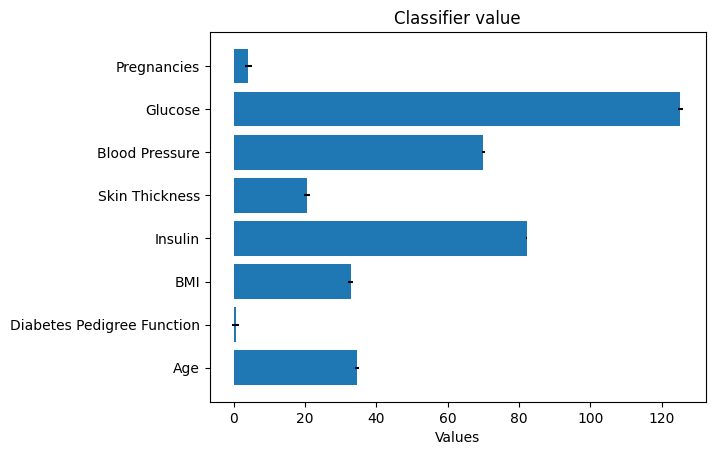

In [ ]:
# Main function

# Read the dataset
data_file = "diabetes.csv"
print("Reading in data...")
data_set_list = create_dataset(data_file)
print("Done reading data.\n")
#print(data_set_list)

#80% of data file will be training set and 20% will be testing set and all is shuffled

training_set_list = random.sample(data_set_list,round(len(data_set_list)*0.8))
test_set_list = [item for item in data_set_list if item not in training_set_list]
print(f"Training set length : {len(training_set_list)}")
print(f"Testing set length : {len(test_set_list)}")

# Train the classifier based on the training set 
print("Training classifier...")
classifier_list = train_classifier(training_set_list)
print("Done training classifier.\n")

# Use classifier list to test the testing set
print("Classifying records...")
result_list = classify_test_set(test_set_list,classifier_list)
print("Done classifying.\n")
print(result_list)

# Display the result as well as the confusion matrix
report_result(result_list)

# Bar graph
plot_classifier(classifier_list)

## **5. Using salaries.csv to manipulate, summarize, and visualize dataset by using NumPy, Pandas, and Matplotlib)**

Summarize and visualize dataset

Test out some hypotheses 


In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import seaborn as sns

#salaries = pd.read_csv('./data/salaries.csv') 

from google.colab import files
uploaded = files.upload()
import io
salaries = pd.read_csv(io.StringIO(uploaded['salaries.csv'].decode('utf-8')))

Saving salaries.csv to salaries.csv


In [ ]:
print(salaries.shape)
print(salaries.count())
salaries.head()
#from google.colab import data_table
#from vega_datasets import data
#data_table.disable_dataframe_formatter()
#data_table.enable_dataframe_formatter()
#data_table.DataTable(data.airports(), include_index=False, num_rows_per_page=10)

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


In [ ]:
# Summary
salaries.describe()

,earn,height,ed,age
count,1192.000000,1192.000000,1192.000000,1192.000000
mean,23154.773490,66.915154,13.504195,41.378356
std,19472.296925,3.853968,2.420175,15.867428
min,200.000000,57.503219,3.000000,18.000000
25%,10000.000000,64.009746,12.000000,29.000000
50%,20000.000000,66.451265,13.000000,38.000000
75%,30000.000000,69.848100,16.000000,51.000000
max,200000.000000,77.051282,18.000000,91.000000


In [ ]:
salary = np.array(salaries['earn'])
print("--- Salary statistics ---")
print("Minimum salary (global): ${:6.2f}".format(np.min(salary)))
print("Maximum salary (global): ${:6.2f}".format(np.max(salary)))
print("Average salary (global): ${:6.2f}".format(np.mean(salary)))
print("Median  salary (global): ${:6.2f}".format(np.median(salary)))

--- Salary statistics ---
Minimum salary (global): $200.00
Maximum salary (global): $200000.00
Average salary (global): $23154.77
Median  salary (global): $20000.00


Text(0, 0.5, 'Number of Employees')

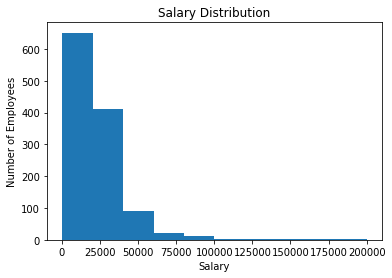

In [ ]:
# Visualize data with histogram and scatterplot
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')

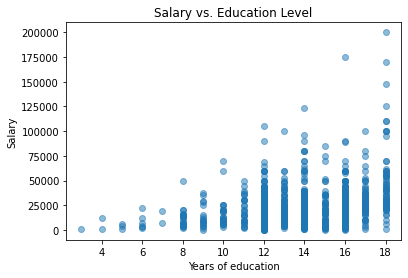

In [ ]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education');
plt.scatter(years, salary, alpha=0.5)
plt.show()

In [ ]:
# Total headcount and the number (and %) of male and female employees. 
total_headcount = salaries['sex'].count()
print(f'Total headcount: {total_headcount}')

#Count number of male and female:
print(f"\nNumber of male and female:\n{salaries['sex'].value_counts(dropna=False)}")

#Count in %
print(f"\nNumber of male in female in %:\n{salaries['sex'].value_counts(normalize=True)}")

Total headcount: 1192

Number of male and female:
female    687
male      505
Name: sex, dtype: int64

Number of male in female in %:
female    0.576342
male      0.423658
Name: sex, dtype: float64


In [ ]:
# Compute and display the min, max, average, and median salary per gender

salaries.groupby(by='sex')['earn'].describe()

#salaries.groupby(by='sex').agg({'earn': ['min','max','mean','median' ]})

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,687.0,18280.195051,14259.932378,200.0,9000.0,15000.0,25000.0,123000.0
male,505.0,29786.130693,23297.816034,1000.0,16000.0,25000.0,36000.0,200000.0


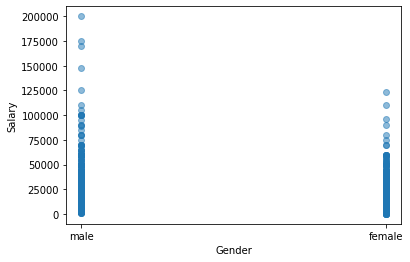

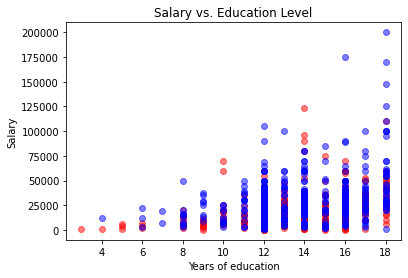

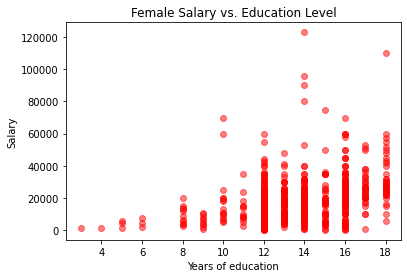

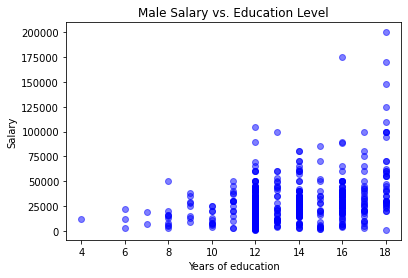

In [ ]:
# Provide insight into the gender inequality (if any is present) associated with the salaries in the company
# Female get paid less than male

# We can see that the highest salary female can get is 120k at 14 years of education and male is 200k at 18 years of education. 
# The highest salary at 18 years of education for woman is about 100k which is less than twice man
# Notice that man and woman nearly have the same number of people attending school for 18 years

plt.ylabel('Salary')
plt.xlabel('Gender');
plt.scatter(np.array(salaries['sex']), np.array(salaries['earn']), alpha=0.5)
plt.show()

years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education')
plt.scatter(np.array(salaries[salaries["sex"] == "female"]['ed']), np.array(salaries[salaries["sex"] == "female"]['earn']), alpha=0.5,c='r')
plt.scatter(np.array(salaries[salaries["sex"] == "male"]['ed']), np.array(salaries[salaries["sex"] == "male"]['earn']), alpha=0.5,c='b')
plt.show()

plt.title('Female Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education')
plt.scatter(np.array(salaries[salaries["sex"] == "female"]['ed']), np.array(salaries[salaries["sex"] == "female"]['earn']), alpha=0.5,c='r')
plt.show()

plt.title('Male Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education')
plt.scatter(np.array(salaries[salaries["sex"] == "male"]['ed']), np.array(salaries[salaries["sex"] == "male"]['earn']), alpha=0.5,c='b')
plt.show()

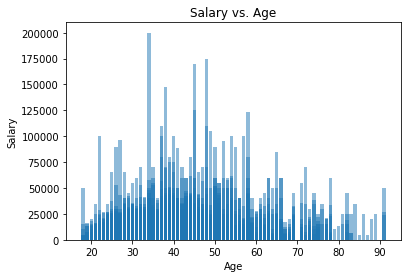

In [ ]:
# H1: Older employees are paid less (i.e., ageism)
# We can see that when we get closer to the right (age), the salary starts decreasing
plt.title('Salary vs. Age')
plt.ylabel('Salary')
plt.xlabel('Age');
plt.bar( salaries['age'],salaries['earn'], alpha=0.5)
plt.show()

Number of male has salary greater than 120k: 505
Number of female has salary greater than 120k: 687
Number of male has 18 years of education: 505
Number of female has 18 years of education: 687
Number of male has education year greater than 10: 505
Number of female has education year greater than 10: 687


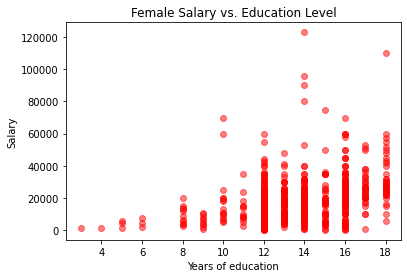

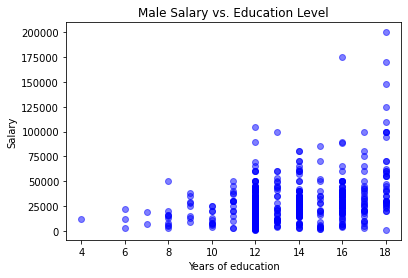

In [ ]:
# H2: Female employees are paid less (i.e., gender bias)
# We can see that the highest salary female can get is 120k at 14 years of education while male gets 200k at 18 years of education. 
# The highest salary at 18 years of education for woman is about 100k which is less than twice man
# Notice that man and woman nearly have the same number of people attending school for 18 years
# Also, woman has more people have a higher education years, but they get paid less than man
# Even though more years of education does not tell that you have more ideas or outperforms others, but experience in school is still a thing to consider

male_greater_120 = [male for male in np.array(salaries[salaries["sex"] == "male"]['earn']>120000)]
female_greater_120 = [female for female in np.array(salaries[salaries["sex"] == "female"]['earn']>120000)]
print("Number of male has salary greater than 120k: {}".format(len(male_greater_120)))
print("Number of female has salary greater than 120k: {}".format(len(female_greater_120)))

male_greater_18y = [male for male in np.array(salaries[salaries["sex"] == "male"]['ed']>=18)]
print("Number of male has 18 years of education: {}".format(len(male_greater_18y)))
female_greater_18y = [female for female in np.array(salaries[salaries["sex"] == "female"]['ed']>=18)]
print("Number of female has 18 years of education: {}".format(len(female_greater_18y)))

male_edu_greater_10 = [male for male in np.array(salaries[salaries["sex"] == "male"]['ed']>=10)]
print("Number of male has education year greater than 10: {}".format(len(male_edu_greater_10)))
female_edu_greater_10 = [female for female in np.array(salaries[salaries["sex"] == "female"]['ed']>=10)]
print("Number of female has education year greater than 10: {}".format(len(female_edu_greater_10)))

plt.title('Female Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education')
plt.scatter(np.array(salaries[salaries["sex"] == "female"]['ed']), np.array(salaries[salaries["sex"] == "female"]['earn']), alpha=0.5,c='r')
plt.show()

plt.title('Male Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education')
plt.scatter(np.array(salaries[salaries["sex"] == "male"]['ed']), np.array(salaries[salaries["sex"] == "male"]['earn']), alpha=0.5,c='b')
plt.show()

In [ ]:
# Compute and display the min, max, average, and median salary per gender

salaries.groupby(by='sex')['earn'].describe()

salaries.groupby(by='sex').agg({'earn': ['min','max','mean','median' ]})

earn                                 
           min       max          mean   median
sex                                            
female   200.0  123000.0  18280.195051  15000.0
male    1000.0  200000.0  29786.130693  25000.0

In [ ]:
# H3: Non-whites are paid less (i.e, race bias).
# Compute and display the min, max, average, and median salary per race

salaries.groupby(by='race')['earn'].describe()

salaries.groupby(by='race').agg({'earn': ['min','max','mean','median' ]})

earn                                 
             min       max          mean   median
race                                             
black      600.0   60000.0  19624.214286  20000.0
hispanic  1400.0   55000.0  18263.636364  16000.0
other     3000.0  110000.0  23096.640000  20000.0
white      200.0  200000.0  23882.469161  20000.0


Number of each race:
white       989
black       112
hispanic     66
other        25
Name: race, dtype: int64


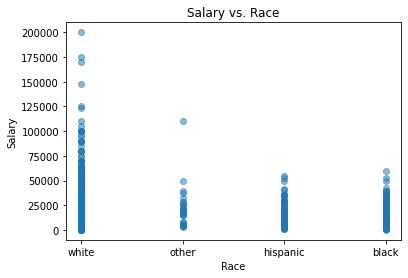

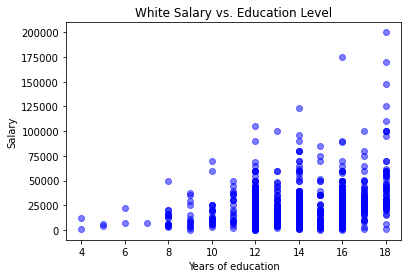

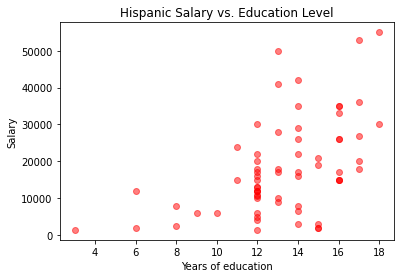

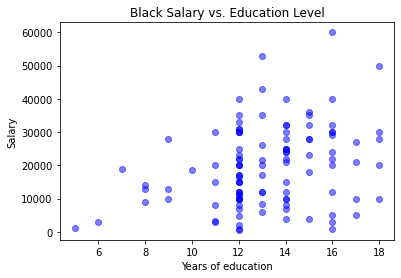

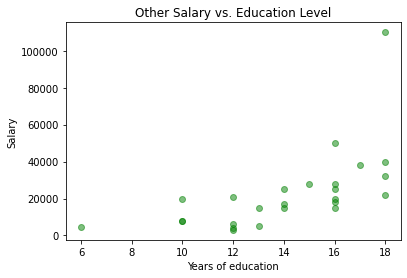

In [ ]:
# We can see that white has the highest salary (200K) compared to other races even though other races also have the same year of education.
# Moreover, in this dataset, we have unbalanced number of people for each race, so white has more people and diverse data than other races.
# Speaking of it, we cannot conclude anything from this dataset because the difference in number of people in each race is too huge. 
# If we compared white to other races, the difference is still too high. The dataset is lack of diversity and very biased to white.
print(f"\nNumber of each race:\n{salaries['race'].value_counts(dropna=False)}")

plt.title('Salary vs. Race')
plt.ylabel('Salary')
plt.xlabel('Race');
plt.scatter(salaries['race'],salaries['earn'], alpha=0.5)
plt.show()

plt.title('White Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education')
plt.scatter(np.array(salaries[salaries["race"] == "white"]['ed']), np.array(salaries[salaries["race"] == "white"]['earn']), alpha=0.5,c='b')
plt.show()

plt.title('Hispanic Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education')
plt.scatter(np.array(salaries[salaries["race"] == "hispanic"]['ed']), np.array(salaries[salaries["race"] == "hispanic"]['earn']), alpha=0.5,c='r')
plt.show()

plt.title('Black Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education')
plt.scatter(np.array(salaries[salaries["race"] == "black"]['ed']), np.array(salaries[salaries["race"] == "black"]['earn']), alpha=0.5,c='b')
plt.show()

plt.title('Other Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education')
plt.scatter(np.array(salaries[salaries["race"] == "other"]['ed']), np.array(salaries[salaries["race"] == "other"]['earn']), alpha=0.5,c='g')
plt.show()


## **6. Iris flower classification by using Scikit-Learn (DecisionTreeClassifier and KNeighborsClassifier)**

Build a decision tree classifier using scikit-learn's DecisionTreeClassifier

Plot the decision tree using plot_tree 

Perform k-fold cross validation using k = 3 

Predict 

Calculate accuracy for test data


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


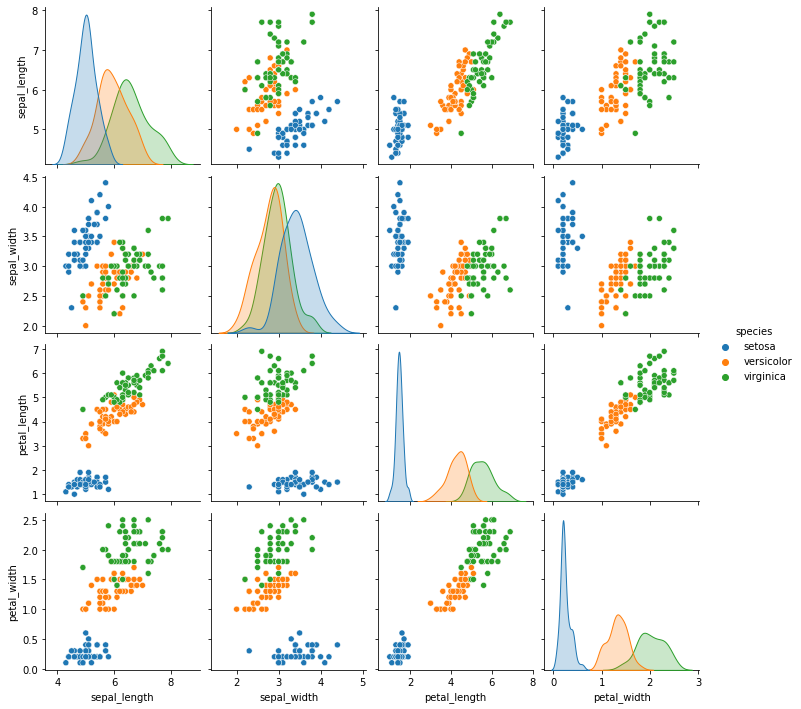

In [3]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Display summary statistics for the whole dataset
iris.describe()

In [5]:
# Build a decision tree classifier using scikit-learn's DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Preprocess data by coverting the string values of the species into interger

# Get all species
iris['species'].unique()

# Encode the species into interger
iris['species_encod'] = iris['species'].apply(lambda x: 0 if x == 'setosa' else 1 if x == 'versicolor' else 2)
iris['species_encod'].unique()

# Target
y = iris[['species_encod']]
#print(iris)

# All attributes 
X = iris.iloc[:,0:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Get all species
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
iris['species_encod'].unique()

array([0, 1, 2])

In [11]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [9]:
y = iris[['species_encod']]
print(y)

     species_encod
0                0
1                0
2                0
3                0
4                0
..             ...
145              2
146              2
147              2
148              2
149              2

[150 rows x 1 columns]


In [10]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_encod
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [12]:
# Normalize the data

#Createa a copy of dataset
iris_scaled = iris.copy()

#Create a minmaxscaler
min_max_scaler = MinMaxScaler()

#Transform the data
iris_scaled.iloc[:, 0:4] = min_max_scaler.fit_transform(iris_scaled.iloc[:, 0:4])
X = iris_scaled.iloc[:, 0:4]

#X.describe()

# Split: 20% training set and 80% training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# Create decision tree
dtc = DecisionTreeClassifier()

# Run the model
dtc.fit(X_train, np.ravel(y_train))

DecisionTreeClassifier()

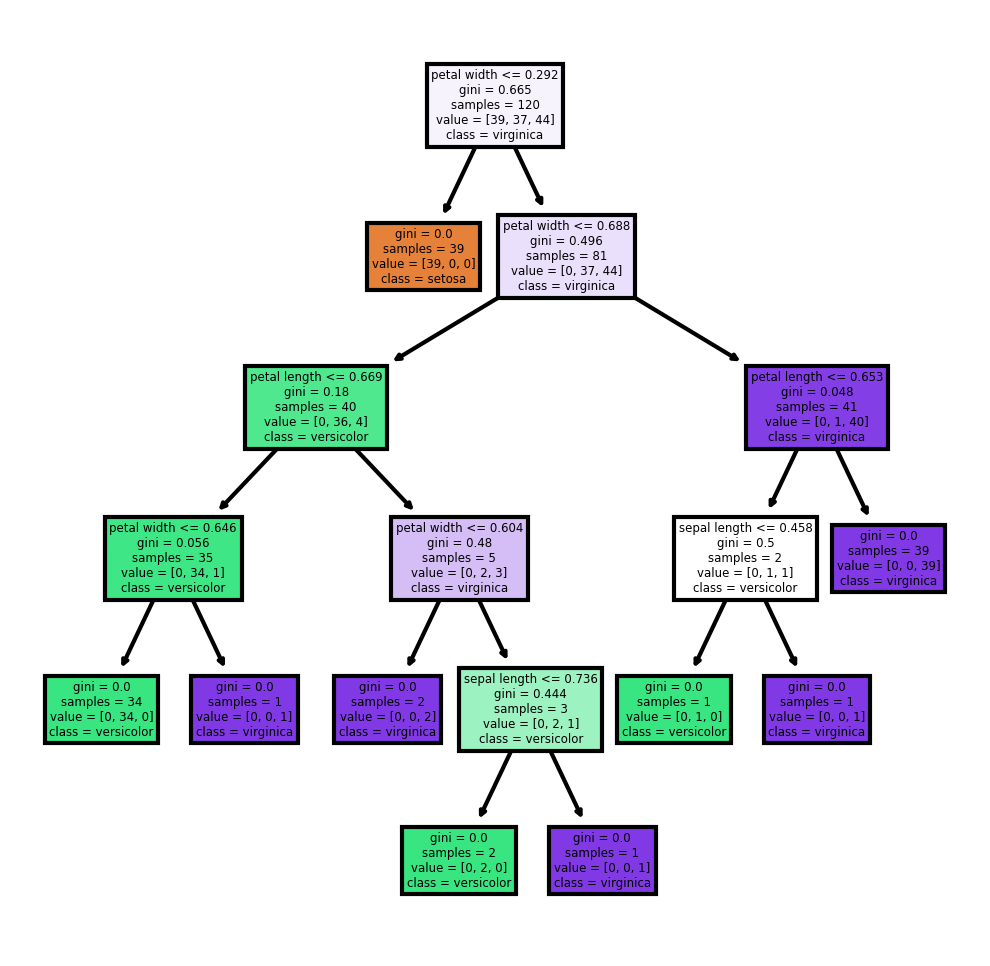

In [13]:
# 2. Plot the resulting decision tree. 
from sklearn import tree
import matplotlib.pyplot as plt
fn=['sepal length','sepal width','petal length','petal width']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300,)
tree.plot_tree(dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [14]:
# 3. Perform k-fold cross-validation using k=3 and display the results.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=3)

In [16]:
X_test.iloc[:10]

,sepal_length,sepal_width,petal_length,petal_width
114,0.416667,0.333333,0.694915,0.958333
62,0.472222,0.083333,0.508475,0.375000
33,0.333333,0.916667,0.067797,0.041667
107,0.833333,0.375000,0.898305,0.708333
7,0.194444,0.583333,0.084746,0.041667
100,0.555556,0.541667,0.847458,1.000000
40,0.194444,0.625000,0.050847,0.083333
86,0.666667,0.458333,0.627119,0.583333
76,0.694444,0.333333,0.644068,0.541667
71,0.500000,0.333333,0.508475,0.500000


In [15]:
knn.predict(X_test.iloc[:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [17]:
y_test[:10]

,species_encod
114,2
62,1
33,0
107,2
7,0
100,2
40,0
86,1
76,1
71,1


In [19]:
knn.predict(X_test.iloc[:])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [23]:
y_test[:]

,species_encod
114,2
62,1
33,0
107,2
7,0
100,2
40,0
86,1
76,1
71,1


In [18]:
knn.score(X_test, y_test)

0.9666666666666667